 <b>RANDOM FOREST CLASSIFIER</b>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
df=pd.read_csv('Heart_Disease_clean.csv')

In [30]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [31]:
df.shape

(270, 14)

In [32]:
df.size

3780

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [34]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [35]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [36]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [57]:
df['Target'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})


In [86]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0


In [59]:
df['Target'].value_counts()

0    150
1    120
Name: Target, dtype: int64

In [89]:
new_df=df.drop(columns= ['Heart Disease'], inplace=False)

In [90]:
new_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


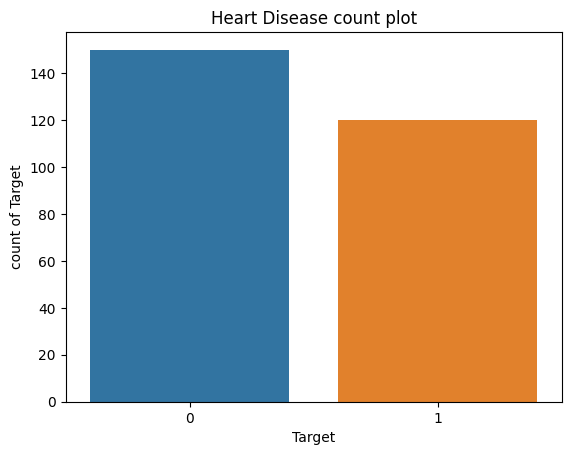

In [91]:
sns.countplot(x=new_df["Target"])
plt.xlabel("Target")
plt.ylabel("count of Target")
plt.title("Heart Disease count plot")
plt.show()

In [92]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [93]:
x.shape

(270, 13)

In [94]:
y


0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Target, Length: 270, dtype: int64

In [95]:
y.shape

(270,)

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=54)

In [97]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(criterion='gini',
                            max_depth=8,
                            min_samples_split=10,
                            random_state =5)

In [98]:
 clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [99]:
clf.feature_importances_

array([0.06369255, 0.03429254, 0.12789041, 0.06249525, 0.05716271,
       0.00946337, 0.01742679, 0.11022044, 0.06843321, 0.10743603,
       0.03696849, 0.13010586, 0.17441235])

In [100]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease',
       'Target'],
      dtype='object')

In [102]:
y_pred =clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1], dtype=int64)

In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_test,y_pred)

array([[32,  8],
       [ 5, 23]], dtype=int64)

In [109]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x_train,y_train,cv=10)


array([0.80952381, 0.85714286, 0.8       , 0.9       , 0.95      ,
       0.8       , 0.8       , 0.7       , 0.8       , 1.        ])

In [111]:
print("classification report")
print(classification_report(y_pred,y_test))

classification report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        37
           1       0.82      0.74      0.78        31

    accuracy                           0.81        68
   macro avg       0.81      0.80      0.81        68
weighted avg       0.81      0.81      0.81        68



<b>Feature Selection</b>

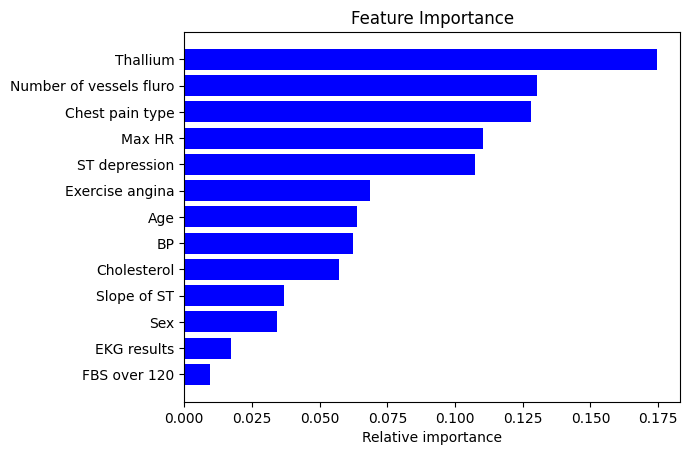

In [117]:
features =df.columns
importances =clf.feature_importances_
indices =np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()